In [34]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser

pn.extension()

%matplotlib inline

In [35]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools

In [36]:
# Build tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [37]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)

In [38]:
atlas.head()

,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Service Start,Service End
Customers,,,,,,,
University 1,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 102,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 3,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 4,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00
University 5,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00


<AxesSubplot:xlabel='Customers'>

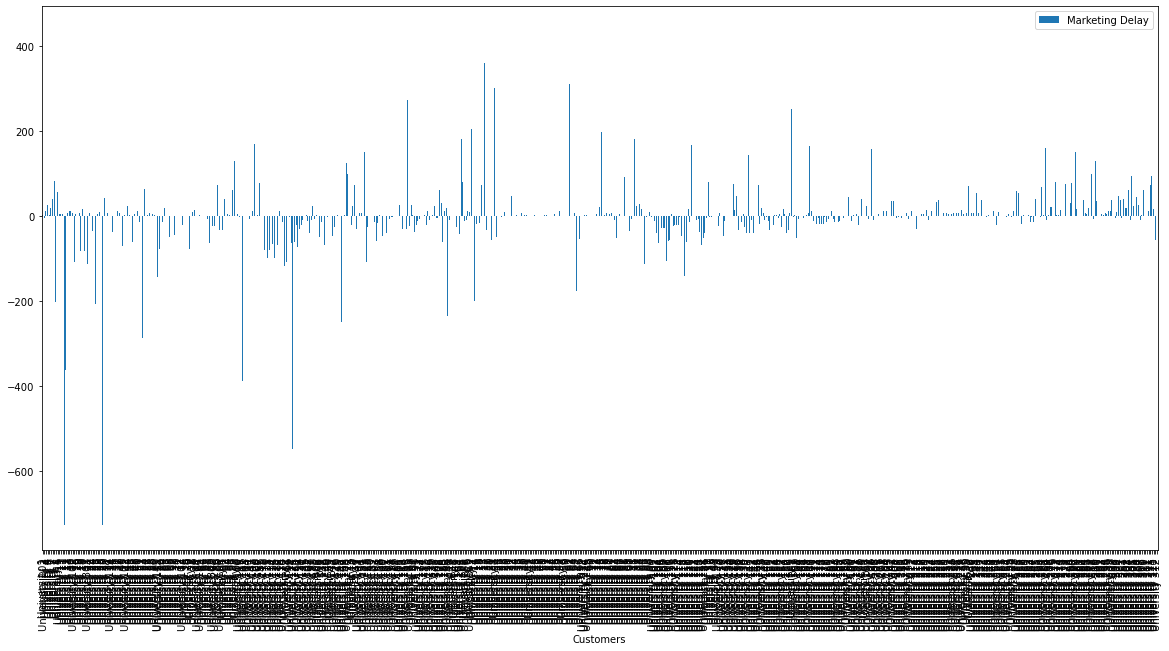

In [39]:
# Plot delays between marketing initiation and payment date (NOTE: This is sample data and not accurate until relevant data is available.)
marketing_delay = atlas["Invoice Date"] - atlas["Service Start"]
marketing_delay_days = marketing_delay.apply(lambda date: date.days)
marketing_delay_df = pd.DataFrame(marketing_delay_days, columns=["Marketing Delay"])
marketing_delay_df.plot.bar(figsize=(20, 10))

<AxesSubplot:ylabel='Customers'>

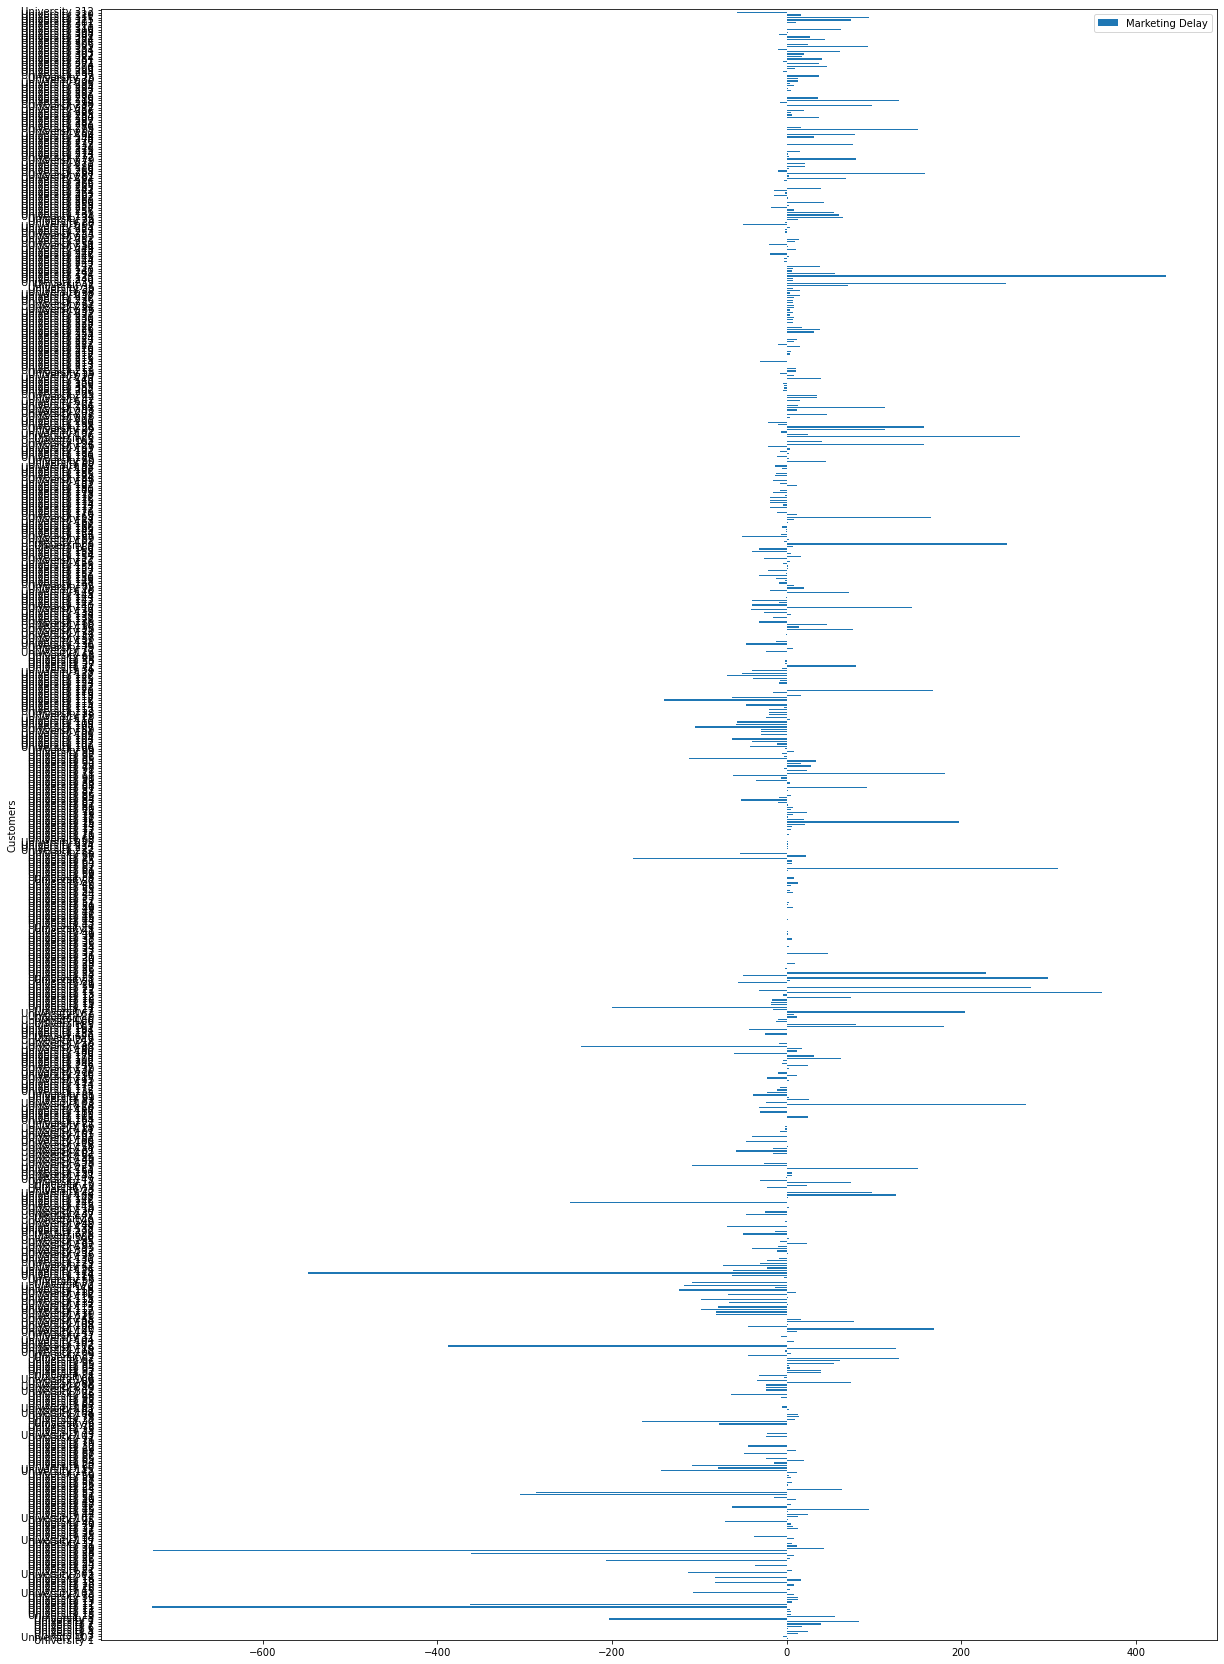

In [40]:
marketing_delay_df.plot.barh(figsize=(20, 30))

In [62]:
# Basic info
total_invoiced_per_customer = atlas.groupby(["Customers"]).sum()
total_invoiced_per_customer.head()

,Invoice Amount
Customers,
University 1,139000.0
University 10,4400.0
University 100,3000.0
University 101,5750.0
University 102,10500.0


In [81]:
atlas.head(1)

,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Service Start,Service End
Customers,,,,,,,
University 1,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00


In [118]:
def fcn(df):
    print(f"Size of df: {df.size}")
    # dfs = df["Subscription"]
    # print(f"Contents of of df[Subscription]: {dfs}")
    # print(f"Contents of of df: {df}")

    customer_subscriptions_ordered_by_date = df.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")
    # subscriptions = df#.reset_index().loc[["Subscription", "Service Start"]]
    # subscriptions = df["Subscription"].values
    print(subscriptions)

    # TODO fcn to compute upgrade, downgrade, and delays between them.

    return df


# Calculate conversion rates across various subscription combinations
repeat_customers = atlas.index.duplicated()
print(f"There are {repeat_customers.sum()} universities in this dataset who purchased 2 or more subscriptions.")
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
atlas.loc[repeat_customers].groupby("Customers").apply(fcn)


                                     
University 247     3 Months 2020-09-10 00:00:00-04:00
Size of df: 7
               Subscription             Service Start
Customers                                            
University 248       1 Year 2020-08-31 00:00:00-04:00
Size of df: 7
              Subscription             Service Start
Customers                                           
University 25       1 Year 2020-03-17 00:00:00-04:00
Size of df: 7
               Subscription             Service Start
Customers                                            
University 253       1 Year 2020-09-14 00:00:00-04:00
Size of df: 21
              Subscription             Service Start
Customers                                           
University 26       1 Year 2020-03-20 00:00:00-04:00
University 26       1 Year 2020-03-20 00:00:00-04:00
University 26       1 Year 2020-03-20 00:00:00-04:00
Size of df: 7
               Subscription             Service Start
Customers                          

,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Service Start,Service End
Customers,,,,,,,
University 7,2015-12-10 00:00:00-05:00,AJ507,16200.0,1 Year,4700-4-11-00100-00-1502,2015-09-18 00:00:00-04:00,2016-12-31 00:00:00-05:00
University 1,2015-12-11 00:00:00-05:00,AJ5081,67000.0,1 Year,4700-0-00-00000-00-0000,2016-07-01 00:00:00-04:00,2017-12-31 00:00:00-05:00
University 15,2016-01-06 00:00:00-05:00,AJ509,750.0,1 Year,4700-0-00-00000-00-0000,2016-01-01 00:00:00-05:00,2017-01-31 00:00:00-05:00
University 15,2016-05-10 00:00:00-04:00,AJ516,1000.0,1 Year,4700-0-00-00000-00-0000,2016-05-06 00:00:00-04:00,2017-04-30 00:00:00-04:00
University 15,2020-01-13 00:00:00-05:00,000251,2350.0,1 Year,4700-0-00-00000-00-0000,2020-01-31 00:00:00-05:00,2021-01-31 00:00:00-05:00
...,...,...,...,...,...,...,...
University 261,2020-10-19 00:00:00-04:00,NB101920A,2500.0,1 Year,4700-0-00-00000-00-0000,2020-09-08 00:00:00-04:00,2021-10-31 00:00:00-04:00
University 284,2020-10-19 00:00:00-04:00,NB101920B,410.0,1 Year,4700-0-00-00000-00-0000,2020-10-01 00:00:00-04:00,2021-09-30 00:00:00-04:00
University 284,2020-10-28 00:00:00-04:00,NB102320,300.0,1 Year,4700-0-00-00000-00-0000,2020-10-01 00:00:00-04:00,2021-09-30 00:00:00-04:00


In [117]:
# atlas.columns
atlas.loc[:, ["Subscription", "Service Start"]]
atlas.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")

,Subscription,Service Start
Customers,,
University 1,1 Year,2015-03-18 00:00:00-04:00
University 102,1 Year,2015-06-01 00:00:00-04:00
University 4,1 Year,2015-06-01 00:00:00-04:00
University 3,1 Year,2015-06-10 00:00:00-04:00
University 7,1 Year,2015-09-18 00:00:00-04:00
...,...,...
University 30,1 Year,NaT
University 70,1 Year,NaT
University 71,3 Years,NaT
